#3. Conjuntos desbalanceados - parte I

Alterar o alvo para gerar conjuntos de dados para classificação binária. Treinar e testar um modelo de classificação (GradientBoosting) aplicando técnicas de balanceamento de dados (undersampling, oversampling, alteração de limiar) e comparar se um modelo treinado sem aplicar balanceamento é pior ou melhor do ponto de vista preditivo.

Conjuntos de dados: A602.pickle, A621.pickle, A627.pickle,
A636.pickle, A652.pickle

Número de variáveis independentes: 7

Variável dependente: "precipitation"

Modelo utilizado: GradientBoosting

##3.1 Importando bibliotecas

In [3]:
import numpy as np
import pandas as pd

from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

##3.2 Importando dados

Importando os arquivos de treino e teste disponibilizados no github através da biblioteca pandas

In [4]:
A602_train_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_train.parquet.gzip")
A602_test_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_test.parquet.gzip")
A602_val_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_val.parquet.gzip")
A621_train_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A621_train.parquet.gzip")
A621_test_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A621_test.parquet.gzip")
A621_val_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A621_val.parquet.gzip")
A627_train_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_train.parquet.gzip")
A627_test_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_test.parquet.gzip")
A627_val_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A602_val.parquet.gzip")
A636_train_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A636_train.parquet.gzip")
A636_test_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A636_test.parquet.gzip")
A636_val_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A636_val.parquet.gzip")
A652_train_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A652_train.parquet.gzip")
A652_test_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A652_test.parquet.gzip")
A652_val_E3 = pd.read_parquet("https://raw.githubusercontent.com/RodrigoSFMachado/Data_Science/main/data/parquet/A652_val.parquet.gzip")

##3.3 Pre-processamento de dados

Método two-way holdout: Agrupando dados de treinamento e validação

In [5]:
A602_train_E3 = pd.concat([A602_train_E3, A602_val_E3])
A621_train_E3 = pd.concat([A621_train_E3, A621_val_E3])
A627_train_E3 = pd.concat([A627_train_E3, A627_val_E3])
A636_train_E3 = pd.concat([A636_train_E3, A636_val_E3])
A652_train_E3 = pd.concat([A652_train_E3, A652_val_E3])


Observando a estrutura dos dados

In [6]:
A602_train_E3.head(3)

,temperature,barometric_pressure,relative_humidity,wind_direction_u,wind_direction_v,hour_sin,hour_cos,precipitation
2019-12-04 00:00:00,0.373832,0.480114,0.686869,0.403547,0.447290,0.50000,1.000000,0.0
2019-12-04 01:00:00,0.370717,0.485795,0.686869,0.383545,0.444438,0.62941,0.982963,0.0
2019-12-04 02:00:00,0.376947,0.494318,0.686869,0.382324,0.431581,0.75000,0.933013,0.0


Checando informações sobre os dados e verificando a tabela possui campos nulos

In [7]:
A602_train_E3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12851 entries, 2019-12-04 00:00:00 to 2021-11-29 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          12851 non-null  float64
 1   barometric_pressure  12851 non-null  float64
 2   relative_humidity    12851 non-null  float64
 3   wind_direction_u     12851 non-null  float64
 4   wind_direction_v     12851 non-null  float64
 5   hour_sin             12851 non-null  float64
 6   hour_cos             12851 non-null  float64
 7   precipitation        12851 non-null  float64
dtypes: float64(8)
memory usage: 903.6 KB


In [8]:
A602_train_E3.describe()

,temperature,barometric_pressure,relative_humidity,wind_direction_u,wind_direction_v,hour_sin,hour_cos,precipitation
count,12851.000000,12851.000000,12851.000000,12851.000000,12851.000000,12851.000000,12851.000000,12851.000000
mean,0.439439,0.443012,0.816708,0.447351,0.459185,0.500913,0.497889,0.135554
std,0.116318,0.112784,0.118980,0.076943,0.076386,0.354129,0.352997,0.942249
min,0.130841,0.071023,0.212121,0.142865,0.153175,0.000000,0.000000,0.000000
25%,0.361371,0.366477,0.757576,0.413917,0.408173,0.146447,0.146447,0.000000
50%,0.426791,0.440341,0.848485,0.455389,0.454751,0.500000,0.500000,0.000000
75%,0.498442,0.519886,0.898990,0.485557,0.509245,0.853553,0.853553,0.000000
max,0.968847,0.775568,1.000000,0.774435,0.874051,1.000000,1.000000,39.200000


Avaliando graficamente a distribuição da variável dependente (y)

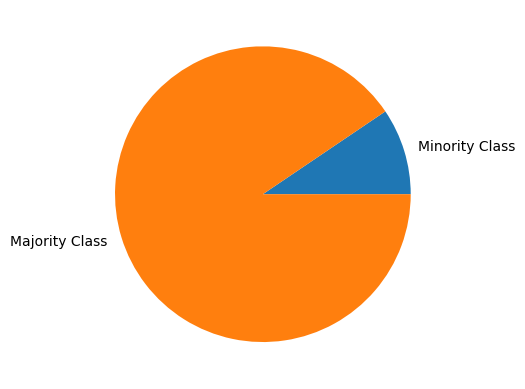

In [9]:
class_division = [ A602_train_E3[A602_train_E3['precipitation'] > 0 ].shape[0], A602_train_E3[A602_train_E3['precipitation'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [10]:
print("Proportion of Minority Class: " + str(round(A602_train_E3[A602_train_E3['precipitation'] > 0 ].shape[0]/A602_train_E3.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 9.46%


Separando a variável dependente (y) das variáveis independentes (X) nos dados de treino e teste e preparando os dados para o modelo de classificação, transformando os valores numéricos contínuos da variavél "y" em valores categóricos nominais.

In [11]:
def data_preparation_E3(data):

  data['categorical_precipitation'] = data['precipitation'].apply(lambda x: 0 if x== 0 else 1)

  X = data.drop(['categorical_precipitation', 'precipitation'], axis = 1)
  y = data['categorical_precipitation']

  return(X,y)

In [12]:
X_A602_train_E3, y_A602_train_E3 = data_preparation_E3(A602_train_E3)
X_A602_test_E3, y_A602_test_E3 = data_preparation_E3(A602_test_E3)
X_A621_train_E3, y_A621_train_E3 = data_preparation_E3(A621_train_E3)
X_A621_test_E3, y_A621_test_E3 = data_preparation_E3(A621_test_E3)
X_A627_train_E3, y_A627_train_E3 = data_preparation_E3(A627_train_E3)
X_A627_test_E3, y_A627_test_E3 = data_preparation_E3(A627_test_E3)
X_A636_train_E3, y_A636_train_E3 = data_preparation_E3(A636_train_E3)
X_A636_test_E3, y_A636_test_E3 = data_preparation_E3(A636_test_E3)
X_A652_train_E3, y_A652_train_E3 = data_preparation_E3(A652_train_E3)
X_A652_test_E3, y_A652_test_E3 = data_preparation_E3(A652_test_E3)

##3.4 Criando/treinando/avaliando modelo

In [13]:
data_original_E3 = {
    'A602' : (X_A602_train_E3 , y_A602_train_E3, X_A602_test_E3 , y_A602_test_E3) ,
    'A621' : (X_A621_train_E3 , y_A621_train_E3, X_A621_test_E3 , y_A621_test_E3),
    'A627' : (X_A627_train_E3 , y_A627_train_E3, X_A627_test_E3 , y_A627_test_E3),
    'A636' : (X_A636_train_E3 , y_A636_train_E3, X_A636_test_E3 , y_A636_test_E3),
    'A652' : (X_A652_train_E3 , y_A652_train_E3, X_A652_test_E3 , y_A652_test_E3)
}

Treinamento do modelo de classificação "GradientBoostingClassifier" e avaliação através das métricas: Accuracy_score/Confusion_matrix/Classification_report.

Considerando as diferentes técnicas para dados desbalanceados: Limiar, Undersampling e Oversampling

In [14]:
for name, (X_train, y_train, X_test, y_test) in data_original_E3.items():

## ---------- ORIGINAL DATA

  model_E3_1 = GradientBoostingClassifier()

  model_E3_1.fit(X_train, y_train)
  y_pred_E3_1 = model_E3_1.predict(X_test)
  accuracy_E3_1 = accuracy_score(y_test, y_pred_E3_1)
  confusion_E3_1 = confusion_matrix(y_test, y_pred_E3_1)
  report_E3_1 = classification_report(y_test, y_pred_E3_1)

  print(f'Original Data: {name} \n Accuracy = {(accuracy_E3_1*100):.2f}% \n Confusion Matrix =  \n{confusion_E3_1} \n Classification_Report =  \n{report_E3_1} \n')

## ---------- LIMIAR CHANGED

  y_pred_E3_2 = (model_E3_1.predict_proba(X_test)[:,1]>=0.3).astype(int)
  accuracy_E3_2 = accuracy_score(y_test, y_pred_E3_2)
  confusion_E3_2 = confusion_matrix(y_test, y_pred_E3_2)
  report_E3_2 = classification_report(y_test, y_pred_E3_2)

  print(f'Limiar Changed Data: {name} \n Accuracy = {(accuracy_E3_2*100):.2f}% \n Confusion Matrix =  \n{confusion_E3_2} \n Classification_Report =  \n{report_E3_2} \n')

## ---------- OVERSAMPLING DATA

  model_E3_2 = GradientBoostingClassifier()

  train_data_temp = pd.concat([X_train, y_train], axis=1)

  precipitation_zero=train_data_temp[train_data_temp['categorical_precipitation'] == 0]
  precipitation_one=train_data_temp[train_data_temp['categorical_precipitation'] == 1]

  upsampled_One = resample(precipitation_one, replace=True, n_samples=len(precipitation_zero), random_state=0)
  upsampled = pd.concat([precipitation_zero, upsampled_One])

  X_train_upsampled = upsampled.drop(columns = ['categorical_precipitation'])
  y_train_upsampled = upsampled['categorical_precipitation']

  model_E3_2.fit(X_train_upsampled, y_train_upsampled)
  y_pred_E3_3 =model_E3_2.predict(X_test)
  accuracy_E3_3 = accuracy_score(y_test, y_pred_E3_3)
  confusion_E3_3 = confusion_matrix(y_test, y_pred_E3_3)
  report_E3_3 = classification_report(y_test, y_pred_E3_3)

  print(f'Oversampling Data: {name} \n Accuracy = {(accuracy_E3_3*100):.2f}% \n Confusion Matrix =  \n{confusion_E3_3} \n Classification_Report =  \n{report_E3_3} \n')

## ---------- UNDERSAMPLING DATA

  model_E3_3 = GradientBoostingClassifier()

  downsampled_Zero = resample(precipitation_zero, replace=False, n_samples=len(precipitation_one), random_state=0)
  downsampled = pd.concat([precipitation_one, downsampled_Zero])

  X_train_downsampled = downsampled.drop(columns = ['categorical_precipitation'])
  y_train_downsampled = downsampled['categorical_precipitation']

  model_E3_3.fit(X_train_downsampled, y_train_downsampled)
  y_pred_E3_4 = model_E3_3.predict(X_test)
  accuracy_E3_4 = accuracy_score(y_test, y_pred_E3_4)
  confusion_E3_4 = confusion_matrix(y_test, y_pred_E3_4)
  report_E3_4 = classification_report(y_test, y_pred_E3_4)

  print(f'Undersampling Data: {name} \n Accuracy = {(accuracy_E3_4*100):.2f}% \n Confusion Matrix =  \n{confusion_E3_4} \n Classification_Report =  \n{report_E3_4} \n')
  print('================================================================== \n')

Original Data: A602 
 Accuracy = 87.11% 
 Confusion Matrix =  
[[638  38]
 [ 61  31]] 
 Classification_Report =  
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       676
           1       0.45      0.34      0.39        92

    accuracy                           0.87       768
   macro avg       0.68      0.64      0.66       768
weighted avg       0.86      0.87      0.86       768
 

Limiar Changed Data: A602 
 Accuracy = 77.47% 
 Confusion Matrix =  
[[536 140]
 [ 33  59]] 
 Classification_Report =  
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       676
           1       0.30      0.64      0.41        92

    accuracy                           0.77       768
   macro avg       0.62      0.72      0.63       768
weighted avg       0.86      0.77      0.81       768
 

Oversampling Data: A602 
 Accuracy = 59.38% 
 Confusion Matrix =  
[[373 303]
 [  9  83]] 
 Classification_R